<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Load csv data file
raw_pd = ''
scores_file = 'sat_scores.csv'
with open(scores_file, 'r') as f:
    raw_pd = f.read()
    
#split the strings into lines
clean1 = raw_pd.splitlines()  

#loop through clean1 to create a list of lists
scores_list = []
for line in clean1:
    holder = []
    for i in line.split(','):
        try:
            holder.append(int(i))
        except:
            holder.append(i)
    scores_list.append(holder)

#fill each list by iterating through each row in scores_list and appending the relevant element to the new list, to be used as values for the dictionary
State_val = []
Rate_val = []
Maths_val = []
Verbal_val = []

for i in range(1,len(scores_list)):
    State_val.append(scores_list[i][0])
    Rate_val.append(scores_list[i][1])
    Maths_val.append(scores_list[i][2])
    Verbal_val.append(scores_list[i][3])

#create the final dictionary
dictionary = {}
dictionary['State'] = State_val
dictionary['Rate'] = Rate_val
dictionary['Maths'] = Maths_val
dictionary['Verbal'] = Verbal_val

dictionary

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Maths': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  561

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#creating Dataframe through .read_csv function
scores = pd.read_csv('sat_scores.csv')
scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [4]:
#creating DataFrame through dictionary
scores_fromdict = pd.DataFrame.from_dict(dictionary)
scores_fromdict.dtypes

State     object
Rate       int64
Maths      int64
Verbal     int64
dtype: object

There is no difference between data types of DataFrames created from a dictionary and the .read_csv function.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The data seems to be a collection of average SAT scores by US state. Rate could refer to the frequency of participation, ie the percentage of the population who sit for the SAT test.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
#printing out entire dataset to visualise data as it is small and manageable to open without head or tail function
scores

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
#row 52 is aggregated data for all states, which should not be included in overall calculations because it is not an individual data point
scores = scores.drop(index=51)

#writing description of each column. This is the only variable that the user needs to manually change when columns are added/dropped
col_desc = ['Abbreviation of state','Percentage of SAT takers in population','Average state score on Verbal section of SAT','Average state score on Math section of SAT']

#zipping description with dtypes as they have the same keys, ie column names. This will be used as values for the dictionary of column properties
col_properties = zip(col_desc, dict(scores.dtypes).values())

#creating dictionary of column properties, to be used as values for the overall data dictionary
scores_properties = dict(zip(list(scores.columns),col_properties))

#creating final data dictionary
data_dict_keys = ['Dataset properties','Number of rows and columns']
data_dict_values = [scores_properties,scores.shape]

scores_dictionary = dict(zip(data_dict_keys,data_dict_values))

pprint(scores_dictionary,width=200)

{'Dataset properties': {'Math': ('Average state score on Math section of SAT', dtype('int64')),
                        'Rate': ('Percentage of SAT takers in population', dtype('int64')),
                        'State': ('Abbreviation of state', dtype('O')),
                        'Verbal': ('Average state score on Verbal section of SAT', dtype('int64'))},
 'Number of rows and columns': (51, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0,0.5,'Frequency')

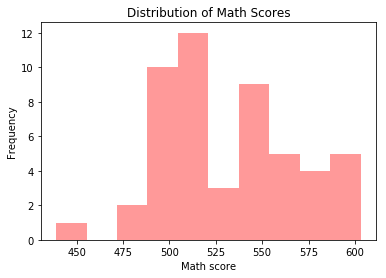

In [8]:
import seaborn as sns

sns.distplot(scores['Math'],bins=10,kde=False,color='Red',axlabel='Math score',label='Math')
plt.title('Distribution of Math Scores')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

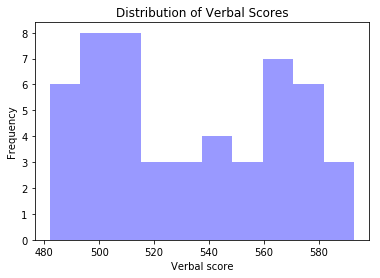

In [9]:
sns.distplot(scores['Verbal'],bins=10,kde=False,color='Blue',axlabel='Verbal score',label='Verbal')
plt.title('Distribution of Verbal Scores')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

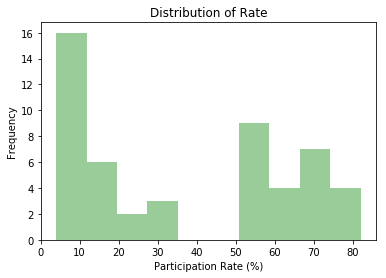

In [10]:
sns.distplot(scores['Rate'],bins=10,kde=False,color='Green',axlabel='Participation Rate (%)')
plt.title('Distribution of Rate')
plt.ylabel('Frequency')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

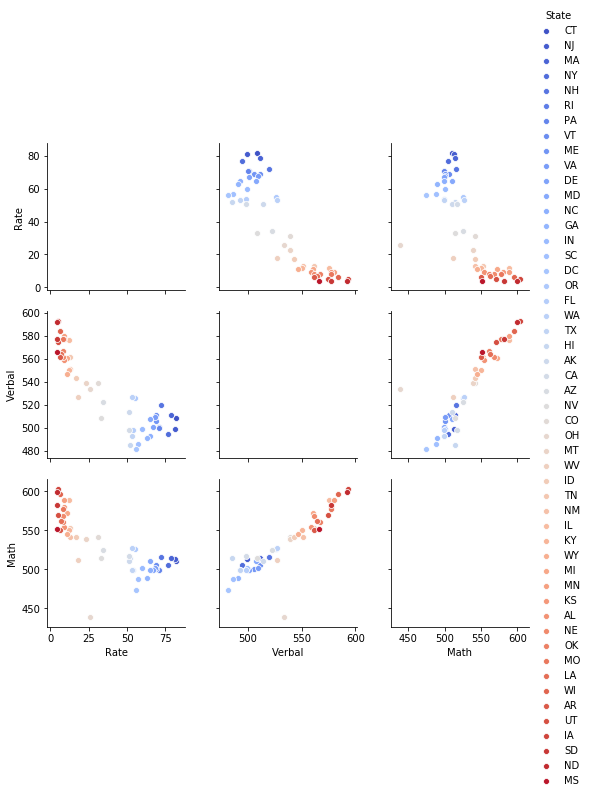

In [11]:
sns.pairplot(scores,hue='State',palette='coolwarm')

With the exception of Ohio (OH), the pairplot shows a high level of correlation between Math and Verbal scores, ie a student who does well in one section is also highly likely to do well on the other.

The correlation between rate and Math/Verbal scores seems to be that the higher the participation rate, the lower the average score. This could be due to compulsory SAT testing in the state, leading to students who do not require to take the test (not planning to go to college, already received other non-academic scholarships etc) to still take it and generally score less well than their counterparts who prepared for it, thus bringing the average down.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0,0.5,'Frequency')

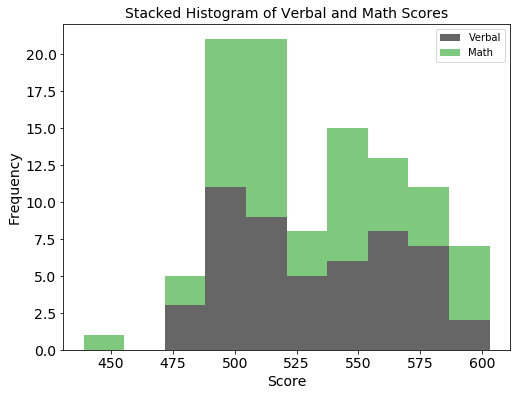

In [12]:
scores[['Verbal','Math']].plot(kind='hist',stacked=True,figsize=(8,6),colormap='Accent_r',fontsize=14)
plt.title('Stacked Histogram of Verbal and Math Scores',fontsize=14)
plt.xlabel('Score',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0,0.5,'Percentage Score')

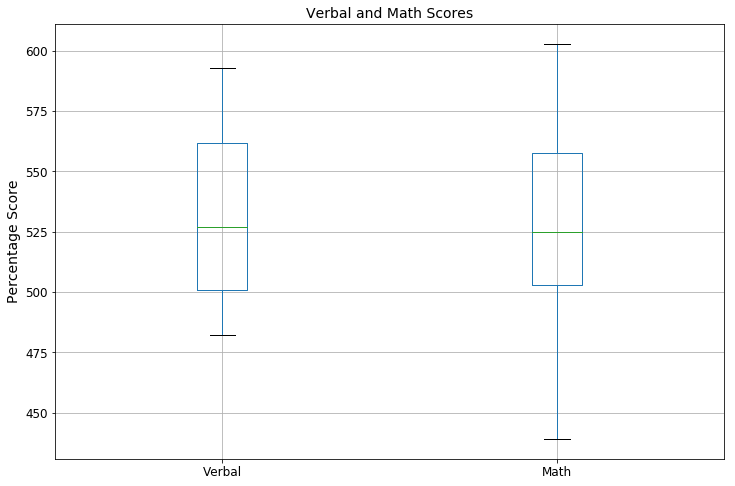

In [13]:
scores.boxplot(column=['Verbal','Math'],figsize=(12,8),fontsize=12)
plt.title('Verbal and Math Scores',fontsize=14)
plt.ylabel('Percentage Score',fontsize=14)

A boxplot is able to show the min and max values, 25th, 50th (median) and 75th percentile and the upper and lower outliers of a dataset. This makes it easy to visually identify the variance within the dataset and is useful for quickly quantifying these metrics to determine the quality of data.

A scatter plot does not show any of these metrics and would be more suited to visualise the correlation between variables, while a histogram is only useful for visualising the differences between values of variables in proportion to one another as it does not show percentile values.

Rate should not be plotted on the same axis as the SAT scores as it measures on a different scale. As rate measures percentage of participation, the maximum value is 100 whereas Verbal and Math scores have a maximum value of 800. Even though both are numerical values, plotting them on the same graph may confuse the reader into thinking the Rate variable has values which are higher than 100.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Text(0,0.5,'Percentage Score')

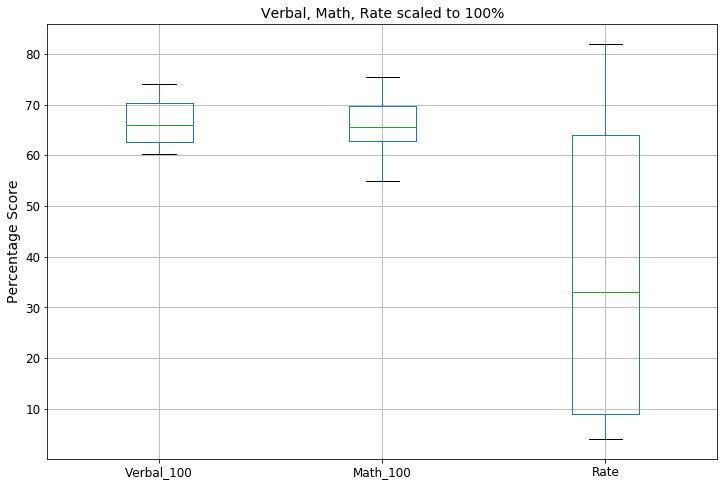

In [14]:
#convert math and verbal scores to scale of 100 based on full marks being 800
scores_scaled = pd.DataFrame()
scores_scaled['Verbal_100'] = scores['Verbal']/8
scores_scaled['Math_100'] = scores['Math']/8
scores_scaled['Rate'] = scores['Rate']

scores_scaled.boxplot(figsize=(12,8),fontsize=12)
plt.title('Verbal, Math, Rate scaled to 100%',fontsize=14)
plt.ylabel('Percentage Score',fontsize=14)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
#use .loc to find all states which have higher than average mean verbal scores
verbal_higherthanmean = (scores[scores.loc[:,'Verbal'] > np.mean(scores['Verbal'])])['State']
print(list(verbal_higherthanmean))

#count number of states that appear in the list (by counting number of rows in the dataframe)
verbal_higherthanmean.shape

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


(24,)

Less states make up the upper half of the scores above the mean, signifying that there is a certain amount of standard deviation of scores as less than half the number of total states make up half the total scores of all states.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
verbal_higherthanmedian = (scores[scores.loc[:,'Verbal'] > np.median(scores['Verbal'])])['State']
print(list(verbal_higherthanmedian))

verbal_higherthanmedian.shape

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


(24,)

The list of states above the median is the same as that of the mean, indicating that the dataset of Verbal scores is almost equally distributed on both ends.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
#creating a new dataframe and insert one column of Verbal-Math
scores_VerbalMath = pd.DataFrame()
scores_VerbalMath['Verbal-Math'] = scores['Verbal']-scores['Math']

scores_VerbalMath.head()

,Verbal-Math
0,-1
1,-14
2,-4
3,-10
4,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
#creating copy of scores dataframe to create Verbal-Math dataframe
scores_Verbal = scores.copy()

#add Verbal-Math column to the copied dataframe
scores_Verbal['Verbal-Math'] = scores_VerbalMath['Verbal-Math']

#sort values of dataframe in descending order
scores_Verbal.sort_values('Verbal-Math',ascending=False,inplace=True)

#select top 10 values by dropping the remaining values in the dataframe
scores_Verbal.drop(scores_Verbal.index[10:],inplace=True)

#reset the index and use drop=True function to prevent column of old index number from being added
scores_Verbal.reset_index(drop=True,inplace=True)

scores_Verbal.head(3)

,State,Rate,Verbal,Math,Verbal-Math
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15


In [19]:
#same process, but for Math-Verbal
scores_Math = scores.copy()
scores_Math['Math-Verbal'] = scores['Math'] - scores['Verbal']
scores_Math.sort_values('Math-Verbal',ascending=False,inplace=True)
scores_Math.drop(scores_Math.index[10:],inplace=True)
scores_Math.reset_index(drop=True,inplace=True)

scores_Math.head(3)

,State,Rate,Verbal,Math,Math-Verbal
0,HI,52,485,515,30
1,CA,51,498,517,19
2,NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


Text(87,0.5,'Verbal Score')

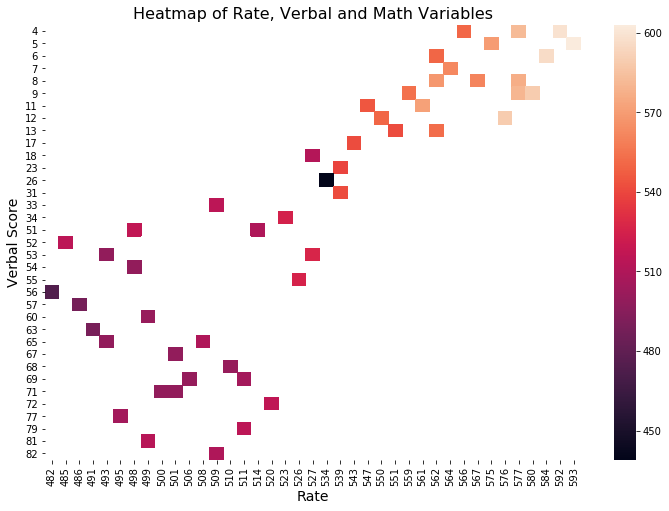

In [20]:
heatmap_data = scores.pivot('Rate','Verbal','Math')
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(heatmap_data)
plt.title('Heatmap of Rate, Verbal and Math Variables',fontsize=16)
plt.xlabel('Rate',fontsize=14)
plt.ylabel('Verbal Score',fontsize=14)

The heatmap confirms the previous analysis of the relationship between rate and the Verbal and Math scores. As rate increases, the average Verbal and Math scores drop.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
scores.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


count = number of non-null values in the column

Mean =  average value of each variable

std = standard deviation of the variable, ie average value of how much each value in the range deviates from the mean

min = smallest value of each variable

25% = 25th percentile score of each variable, ie the n/4th value of a variable with n values, arranged in ascending order

50% = 50th percentile score. This is also the median, ie the middle point of n values which are arranged in ascending order

75% = 75th percentile score of each variable

max = highest value of each variable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [22]:
drugs = pd.read_csv('drug-use-by-age.csv')

drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


The dataset is fairly clean with little empty values. Inferring from the values, 'use' seems to denote the percentage of people in that particular age group who abuse that drug, and 'frequency' seems to be the number of units that they consume in a particular span of time (although these units are unstated in the data.) Cells which are marked '-' seem to be denoted as such because the use case for that age group is zero, therefore frequency is not applicable.

There seems to be some inconsistencies in data, for eg stimulant and sedative use in the 65+ age group is recorded as 0, yet there is a value for the frequency. Most likely this is due to the decimal values being truncated in the process of rounding.

In addition, the drug types of some of the drugs listed in this dataset seem to overlap. For example, oxycontin is the brand name of oxycodone, which is an opioid commonly found in strong painkillers, ie a pain reliever. Heroin is also classified as an opioid and is medically used to relieve intense pain. 'Crack' is actually a type of cocaine, which also appears in the dataset but with a completely different set of values, in addition to it being a stimulant. Meth, or methamphetamine, is also classified as a stimulant.

Due to lack of information on the methods of how the data was collected, we can only assume that columns of drug types (stimulants, inhalants, pain relievers, sedatives and tranquilizers) are referring to drugs other than those which have been recorded separately in another column (cocaine, heroin, oxycontin, etc). For crack and cocaine, it is assumed that 'cocaine' may refer to other types other than crack, such as freebase or hydrochloride cocaine. It would be unwise to drop any of these data points as they form a very significant part of the dataset.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [23]:
drugs.shape

(17, 28)

In [24]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [25]:
#there is a misspelling for pain reliever, need to rename
drugs.rename(index=str,columns={'pain-releiver-use':'pain-reliever-use','pain-releiver-frequency':'pain-reliever-frequency'},inplace=True)

drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-reliever-use', 'pain-reliever-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [26]:
#not all columns have numerical values, need to replace '-' values with 0 to convert into float
drugs['cocaine-frequency'].replace('-',0,inplace=True)
drugs['crack-frequency'].replace('-',0,inplace=True)
drugs['heroin-frequency'].replace('-',0,inplace=True)
drugs['inhalant-frequency'].replace('-',0,inplace=True)
drugs['oxycontin-frequency'].replace('-',0,inplace=True)
drugs['meth-frequency'].replace('-',0,inplace=True)

In [27]:
pd.to_numeric(drugs['meth-frequency'])

0       0.0
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16      0.0
Name: meth-frequency, dtype: float64

In [28]:
drugs['meth-frequency'].astype(float,inplace=True)

0       0.0
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16      0.0
Name: meth-frequency, dtype: float64

In [29]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-reliever-use          17 non-null float64
pain-reliever-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-freque

Cannot seem to convert object rows into float type, despite putting inplace=True in the replace function, and to_numeric and astype fucntions output showing type as float. Therefore I have selected a hypothesis that does not require the frequency of drug use.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

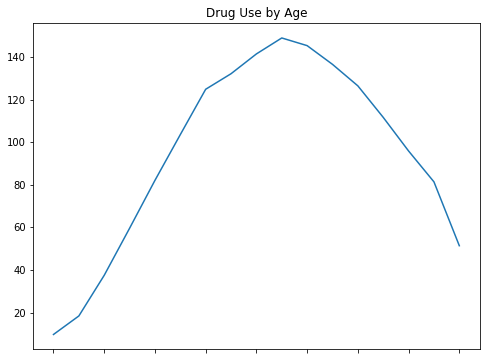

In [30]:
# add all the use percentages together and append to a new column
drugs['Total-percentage'] = drugs['alcohol-use'] + drugs['marijuana-use'] + drugs['cocaine-use'] + drugs['crack-use'] +drugs['heroin-use'] +drugs['hallucinogen-use'] +drugs['inhalant-use'] +drugs['pain-reliever-use'] + drugs['oxycontin-use'] + drugs['tranquilizer-use'] + drugs['stimulant-use'] + drugs['sedative-use'] + drugs['meth-use']

#plot line graph to visualise use percentages
drugs['Total-percentage'].plot(title='Drug Use by Age',figsize=(8,6))

** Question and deliverables**

How does age affect drug use patterns? Specifically, do young people abuse more types of drugs as they grow older?

Here I will assume that these percentage points are mutually exclusive, ie the usage of one drug does not increase nor decrease the propensity to abuse another drug. Therefore, the total percentage points across all drug types for each age group may exceed 100%.

H0: Young abuse more types of drugs as they get older.
H1: Young people do not abuse more types of drugs as they get older.

In [31]:
#Here I have selected the values for 15 year-olds and 21 year-olds as an example.

#list percentage use of each drug type for the 2 age groups
age_15 = [29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4]

age_21 = [83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3]

observations = [age_15,age_21]

#conduct chi-squared test between age groups to determine if they are statistically significant
chi2, p, dof, ex = stats.chi2_contingency(observations, correction=False)

In [32]:
chi2, p

(5.01859034818567, 0.9573551478290175)

**Report**

P-value is 0.957, ie there is a 96% chance that any difference in the samples drawn are due to randomness rather than an actual difference. Therefore we must reject the null hypothesis, ie young people do not abuse more types of drugs as they grow older.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [33]:
rate = list(scores['Rate'])

print(rate)

[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4]


Outliers are generally defined as values which are 3 standard deviations away from the mean. However, given that the mean and standard deviation of the 'Rate' variable is 37 and 27.55 respectively, an outlier would be any value below -45.65 or above 119.65, which does not make sense as rate should only have values between 0 and 100, due to it being a percentage value. Therefore, the suggested adjustment for this case would be 1.5 times the standard deviation, which would yield an upper limit of 78.325. Since the lower limit is below zero, we can safely ignore the value and only impose the upper limit on the variable.

In [34]:
#calculating outliers
outlier = np.mean(rate) + 1.5*np.std(rate)

outliers = []
for i in rate:
    if i >= outlier:
        outliers.append(i)
        
print(outliers)

[82, 81, 79]


In [35]:
#removing outliers from Rate variable
rate = [x for x in rate if x not in outliers]

print(rate)

[77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4]


In [36]:
#calculating new mean, median and mode
print(np.mean(rate))
print(np.median(rate))
print(np.std(rate))

34.270833333333336
28.5
25.767178398864104


All the values are lower than the original list, which is expected since the upper values have been removed. However, the difference between the mean and median is now larger than the original, which means that the new dataset has a larger skew than the original.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [37]:
#spearman correlation is 0.91, indicating a strong positive relationship between Verbal and Math scores

stats.spearmanr(scores['Verbal'],scores['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.